In [1]:
# Convolutional Neural Network
# Binary image classifier for images of cats and dogs
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
from keras.models import Sequential
from keras.models import model_from_json

Using TensorFlow backend.


In [3]:
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

In [5]:
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

In [24]:
classifier = Sequential()
classifier.add(Conv2D(32, (3, 3), input_shape = (50, 50, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Conv2D(64, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Flatten())
classifier.add(Dense(units = 256, activation = 'relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))

In [25]:
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [26]:
classifier.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 48, 48, 32)        896       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 22, 22, 64)        18496     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 11, 11, 64)        0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 7744)              0         
_________________________________________________________________
dense_11 (Dense)             (None, 256)               1982720   
_________________________________________________________________
dense_12 (Dense)             (None, 1)                

In [27]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                  shear_range = 0.2,
                                  zoom_range = 0.2,
                                  horizontal_flip = True)


In [28]:
test_datagen = ImageDataGenerator(rescale = 1./255)

In [38]:
training_set = train_datagen.flow_from_directory("C:\\Users\\marcelo\\Desktop\\dataset\\training_set",
                                                target_size = (50,50),
                                                batch_size = 32,
                                                class_mode = "binary")

Found 8005 images belonging to 2 classes.


In [39]:
test_set = test_datagen.flow_from_directory("C:\\Users\\marcelo\\Desktop\\dataset\\test_set",
                                           target_size = (50, 50),
                                           batch_size = 32,
                                           class_mode = "binary")

Found 2023 images belonging to 2 classes.


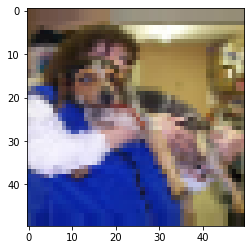

In [40]:
x,y = training_set.next()
for i in range(0,1):
    random_image = x[i]
    plt.imshow(random_image)
    plt.show()

In [42]:
classifier.fit_generator(training_set,
                        steps_per_epoch = 8000,
                        epochs = 25,
                        validation_data = test_set,
                        validation_steps = 2000)

Epoch 1/25
8000/8000 [==============================] - 2290s 286ms/step - loss: 0.3511 - accuracy: 0.8368 - val_loss: 0.6181 - val_accuracy: 0.8087
Epoch 2/25
8000/8000 [==============================] - 2062s 258ms/step - loss: 0.0871 - accuracy: 0.9677 - val_loss: 0.6063 - val_accuracy: 0.7935
Epoch 3/25
8000/8000 [==============================] - 2005s 251ms/step - loss: 0.0437 - accuracy: 0.9847 - val_loss: 0.9346 - val_accuracy: 0.7893
Epoch 4/25
8000/8000 [==============================] - 2013s 252ms/step - loss: 0.0323 - accuracy: 0.9891 - val_loss: 1.3422 - val_accuracy: 0.8003
Epoch 5/25
8000/8000 [==============================] - 2020s 253ms/step - loss: 0.0251 - accuracy: 0.9916 - val_loss: 1.5726 - val_accuracy: 0.7849
Epoch 6/25
8000/8000 [==============================] - 2037s 255ms/step - loss: 0.0206 - accuracy: 0.9935 - val_loss: 0.1046 - val_accuracy: 0.7946
Epoch 7/25
8000/8000 [==============================] - 2037s 255ms/step - loss: 0.0190 - accuracy: 0.9941

In [102]:
test_image = image.load_img("C:\\Users\\marcelo\\Desktop\\dataset\\single_prediction\\cat_or_dog_1.jpg", target_size = (50, 50))

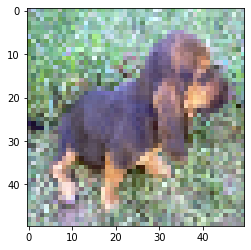

In [103]:
plt.imshow(test_image)
plt.show()

In [104]:
test_image = image.img_to_array(test_image)

In [105]:
test_image = np.expand_dims(test_image, axis = 0)

In [106]:
result = classifier.predict(test_image)

In [107]:
if result[0][0] == 1:
    prediction = 'This is a dog'
else:
    prediction = 'This is a cat'

In [108]:
print(prediction)

This is a dog


In [ ]:
model_json = classifier.to_json()

In [ ]:
with open('cat&dog_model.json', 'w') as json_file:
    json_file.write(model_json)

In [110]:
loss, accuracy = classifier.evaluate_generator(test_set)

In [112]:
print(accuracy)

0.7918932437896729


In [6]:
from quiver_engine import server

In [4]:
json_file = open('cat&dog_model.json', 'r')

In [5]:
loaded_classifier_json = json_file.read()

In [6]:
json_file.close()

In [ ]:
loaded_classifier = model_from_json(loaded_classifier_json)

In [ ]:
loaded_classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
server.launch(loaded_classifier)